In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser
import datetime
datetime
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/mercybenzaquen/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [3]:
df= pd.read_excel('data.xlsx')

In [4]:
df.head()

,Rank,City,"Murder Rate (per 100,000)"
0,1,"Caracas, Venezuela",119.87
1,2,"San Pedro Sula, Honduras",111.03
2,3,"San Salvador, El Salvador",108.54
3,4,"Acapulco, Mexico",104.73
4,5,"Maturin, Venezuela",86.45


In [5]:
df_location= df['City'].apply(lambda x: pd.Series(x.split(',')))


In [6]:
df_location.tail()

,0,1
45,Victoria,Mexico
46,Johanesburgo,South Africa
47,Macapa,Brazil
48,Maracaibo,Venezuela
49,Obregon,Mexico


In [7]:
df_final= pd.concat([df, df_location], axis=1)
df_final.columns

Index(['Rank', 'City', 'Murder Rate (per 100,000)', 0, 1], dtype='object')

In [8]:
df_final.columns = ['Rank', 'nothing','Murder Rate (per 100,000)', 'City', 'Country']

In [9]:
df_final.head(7)

,Rank,nothing,"Murder Rate (per 100,000)",City,Country
0,1,"Caracas, Venezuela",119.87,Caracas,Venezuela
1,2,"San Pedro Sula, Honduras",111.03,San Pedro Sula,Honduras
2,3,"San Salvador, El Salvador",108.54,San Salvador,El Salvador
3,4,"Acapulco, Mexico",104.73,Acapulco,Mexico
4,5,"Maturin, Venezuela",86.45,Maturin,Venezuela
5,6,"Distrito Central, Honduras",73.51,Distrito Central,Honduras
6,7,"Valencia, Venezuela",72.31,Valencia,Venezuela


In [10]:
df_final.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [11]:
df_final.to_csv('project_5_PythonExport.csv', sep=',')

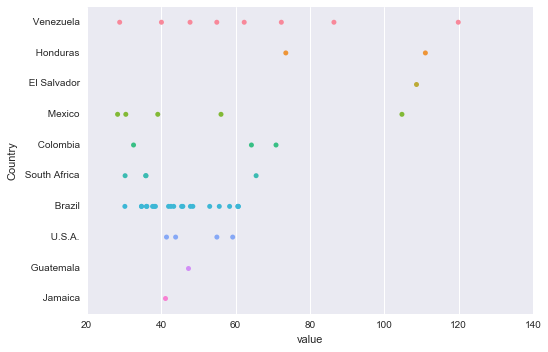

In [12]:
import seaborn as sns
test_df = pd.melt(df_final, id_vars=['Country', 'City'], value_vars=['Murder Rate (per 100,000)'])
ax = sns.stripplot(x='value', y='Country', data=test_df)
plt.savefig("project5.pdf", transparent=True)

# What country has the most cities in the top 50 most violent countries

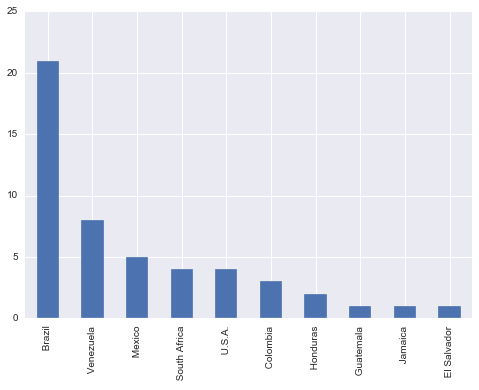

In [56]:
fig, ax = plt.subplots()
df_final['Country'].value_counts().plot(kind= 'bar', stacked= True)
#plt.savefig("project5.pdf", transparent=True)

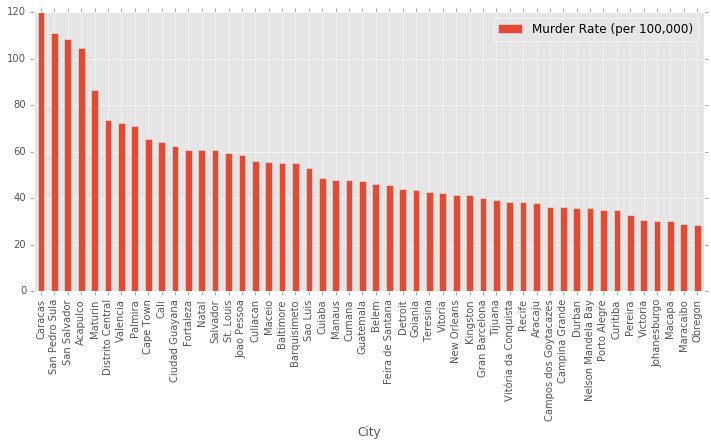

In [91]:
fig, ax = plt.subplots()
df_final.plot(kind= 'bar', x='City', y= 'Murder Rate (per 100,000)', figsize= (12,5), ax=ax)

In [115]:
df_venezuela = df_final[(df_final['Country'] == ' Venezuela')]
df_venezuela

,Rank,nothing,"Murder Rate (per 100,000)",City,Country
0,1,"Caracas, Venezuela",119.87,Caracas,Venezuela
4,5,"Maturin, Venezuela",86.45,Maturin,Venezuela
6,7,"Valencia, Venezuela",72.31,Valencia,Venezuela
10,11,"Ciudad Guayana, Venezuela",62.33,Ciudad Guayana,Venezuela
19,20,"Barquisimeto, Venezuela",54.96,Barquisimeto,Venezuela
23,24,"Cumana, Venezuela",47.77,Cumana,Venezuela
33,34,"Gran Barcelona, Venezuela",40.08,Gran Barcelona,Venezuela
48,49,"Maracaibo, Venezuela",28.85,Maracaibo,Venezuela


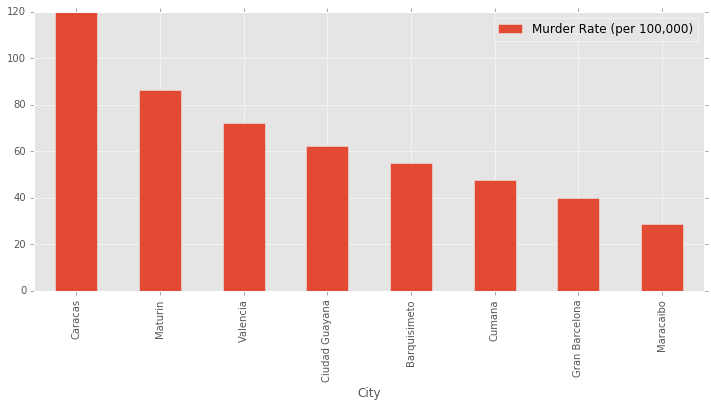

In [116]:
fig, ax = plt.subplots()
df_venezuela.plot(kind= 'bar', x='City', y= 'Murder Rate (per 100,000)', figsize= (12,5), ax=ax)

In [120]:
plt.scatter(df_final['City'], df_final['Murder Rate (per 100,000)'], edgecolor='none', c= df['Country'], alpha= 0.5)

KeyError: 'Country'